# LEAD CASE STUDY

# step1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
leads = pd.read_csv("C:/Users/Hari/Desktop/place/logistics asignment/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [4]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 3: Data Preparation

In [8]:
# removing duplicate rows
leads.drop_duplicates(subset='Lead Number')
leads.shape

(9240, 37)

In [9]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


Visualizing occurence of Null values in the columns based on rows

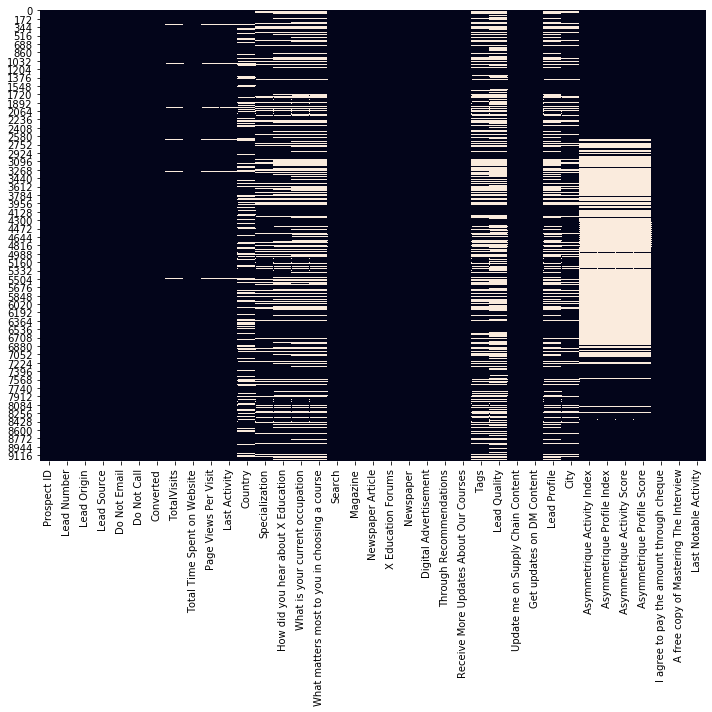

In [10]:
import matplotlib.pyplot as plt,seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

Dropping Unnecessary Columns

In [11]:
# Identifying if any column exists with only null values
leads.isnull().all(axis=0).any()

False

In [12]:
# Dropping all columns with only 0 values
leads.loc[:, (leads != 0).any(axis=0)]
leads.shape

(9240, 37)

In [13]:
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [14]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 30)

In [15]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 29)

In [16]:
#Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [17]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 27)

### Imputing with Median values because the continuous variables have outliers

In [18]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

In [19]:
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

In [20]:
leads['Country'].mode()

0    India
dtype: object

In [21]:
leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'

In [22]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

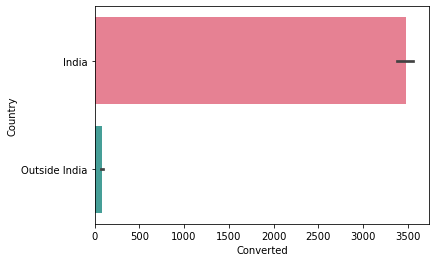

In [23]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads, estimator=np.sum)

## visulaizations

In [24]:
import matplotlib.pyplot as plt,seaborn as sns

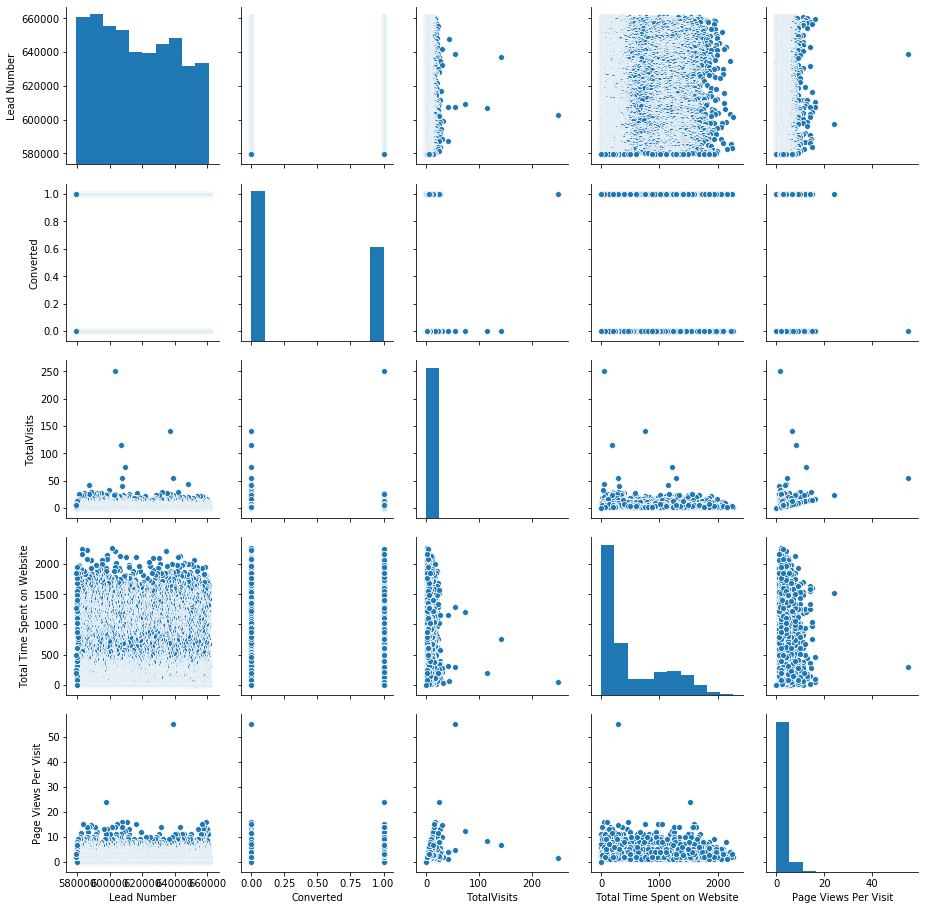

In [25]:
sns.pairplot(leads)
plt.show()

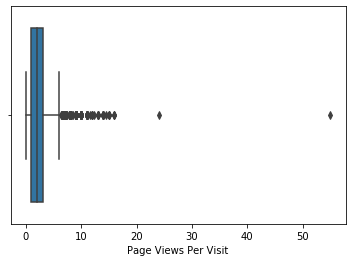

In [26]:
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

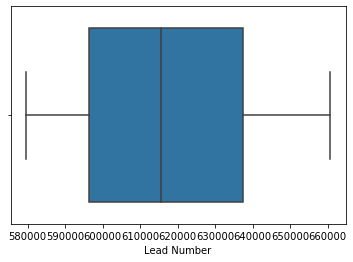

In [27]:
sns.boxplot(leads['Lead Number'])
plt.show()

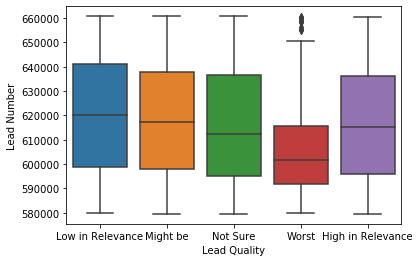

In [28]:
sns.boxplot(leads['Lead Quality'],leads['Lead Number'])
plt.show()

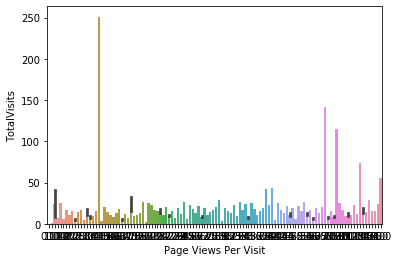

In [29]:
sns.barplot(x='Page Views Per Visit',y='TotalVisits',data=leads)
plt.show()

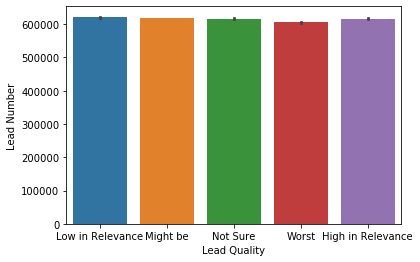

In [30]:
sns.barplot(x='Lead Quality',y='Lead Number',data=leads)
plt.show()

Creating a new category consisting on NULL/Select values for the field Asymmetrique Profile Index

In [31]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [32]:
leads['Lead Quality'].isnull().sum()

4767

In [33]:
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

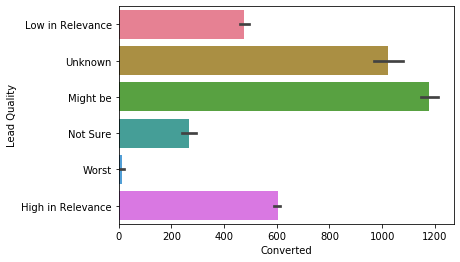

In [34]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [35]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [36]:
leads['Asymmetrique Profile Index'].isnull().sum()

4218

In [37]:
leads['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()

Unknown      4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

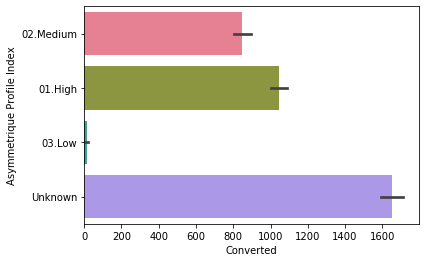

In [38]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [39]:
#for Asymmetrique Activity Index

In [40]:
leads['Asymmetrique Activity Index'].value_counts()
leads['Asymmetrique Activity Index'].isnull().sum()
leads['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Activity Index'].value_counts()

Unknown      4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

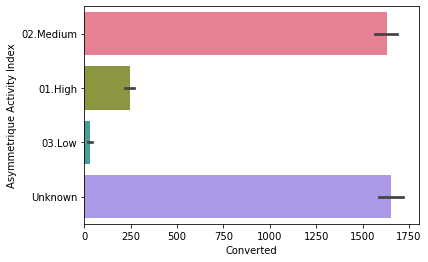

In [41]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [42]:
#for City

In [43]:
leads['City'].isnull().sum()
leads['City'].fillna("Unknown", inplace = True)
leads['City'].value_counts()
leads['City'].replace('Select', 'Unknown', inplace =True)
leads['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

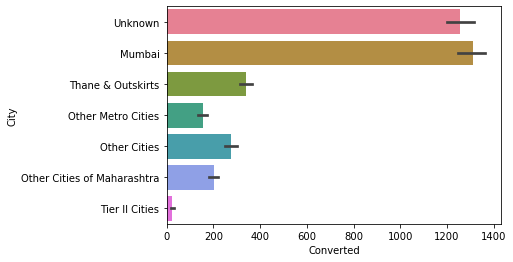

In [44]:
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [45]:
#for last activity
leads['Last Activity'].value_counts()
leads['Last Activity'].isnull().sum()
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

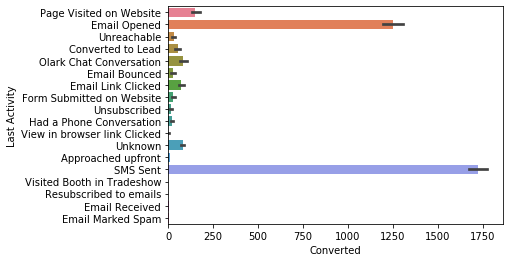

In [46]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [47]:
leads['What is your current occupation'].value_counts()
leads['What is your current occupation'].isnull().sum()
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

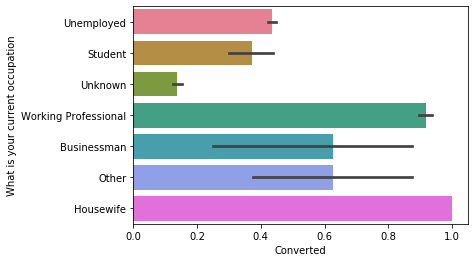

In [48]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads)

In [49]:
# for lead profile
leads['Lead Profile'].value_counts()
leads['Lead Profile'].isnull().sum()
leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Select                         4146
Unknown                        2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [50]:
leads['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads['Lead Profile'].value_counts()

Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

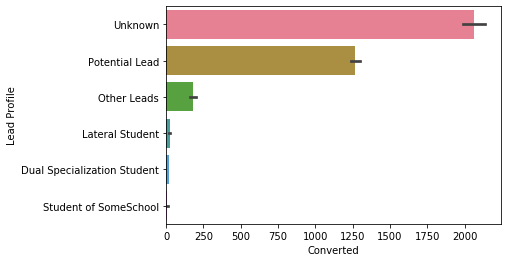

In [51]:
sns.barplot(y='Lead Profile', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [52]:
# for tags
leads['Tags'].value_counts()
leads['Tags'].isnull().sum()
leads['Tags'].fillna("Unknown", inplace = True)
leads['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

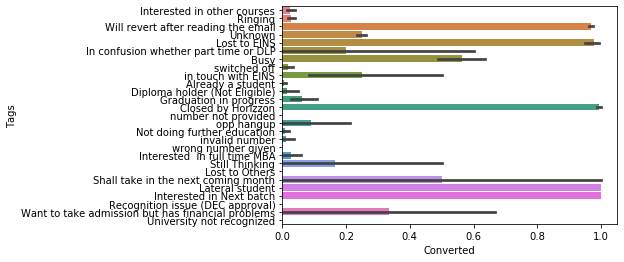

In [53]:
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads)

In [54]:
leads['Specialization'].value_counts()
leads['Specialization'].isnull().sum()
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Select                               1942
Unknown                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

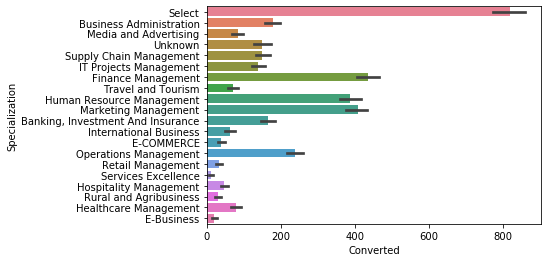

In [55]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [56]:
leads['Lead Quality'].value_counts()
leads['Lead Quality'].isnull().sum()
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

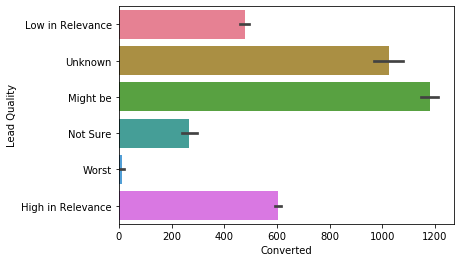

In [57]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=leads, estimator=np.sum)

Reinspecting Null Values

In [58]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Lead Source,36,0.39
Last Notable Activity,0,0.00
What is your current occupation,0,0.00
Lead Origin,0,0.00
Do Not Email,0,0.00


Checking for Outliers

In [59]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,650506.1,655404.05,659592.98,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,1380.0,1562.00,1840.61,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


In [60]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


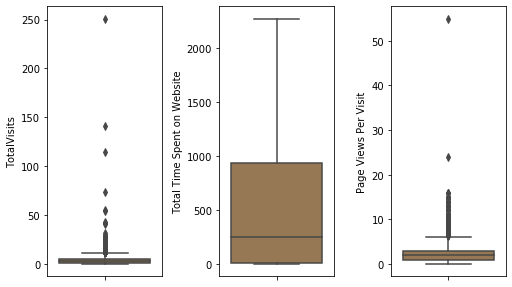

In [61]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

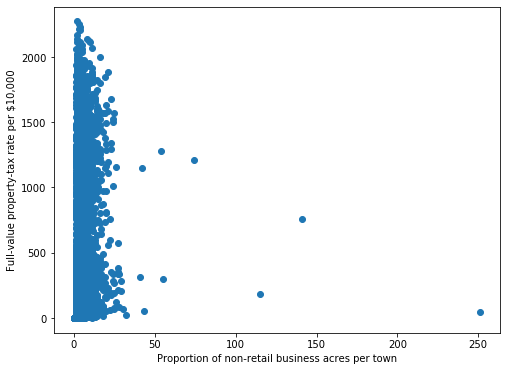

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads['TotalVisits'], leads['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

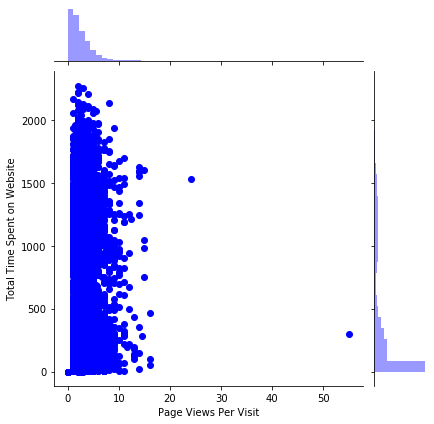

In [63]:
sns.jointplot(leads['Page Views Per Visit'],leads['Total Time Spent on Website'], color="b")
plt.show()

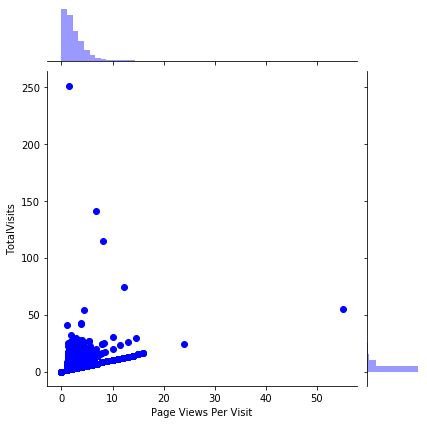

In [64]:
sns.jointplot(leads['Page Views Per Visit'],leads['TotalVisits'], color="b")
plt.show()

## Removing outlier values based on the Interquartile distance

In [65]:
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(8611, 27)

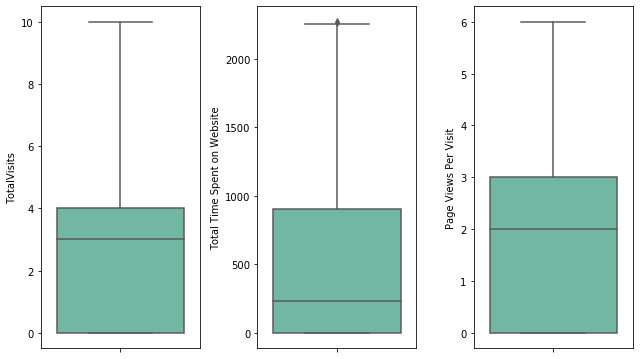

In [66]:
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

In [67]:
leads.shape

(8611, 27)

Converting some binary variables (Yes/No) to 0/1

In [68]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,0,Modified


For categorical variables with multiple levels, creating dummy features

In [69]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(8611, 67)

In [70]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Quality'
ml = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(leads['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
leads.shape

(8611, 157)

## Dropping the repeated variables

In [71]:
leads = leads.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
leads.shape

(8611, 144)

In [72]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [74]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(8611, 144)
(8611, 144)


# Step 4: Test-Train Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5: Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
532,0,0,0.106035,-0.442813,0.569927,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7273,0,0,1.834432,2.375255,-0.407388,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4998,0,0,-1.190262,-0.870128,-1.262538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6668,0,0,0.106035,-0.247575,0.569927,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2917,0,0,-1.190262,-0.870128,-1.262538,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6027.000000,6027.000000,6.027000e+03,6.027000e+03,6.027000e+03,6027.000000,6027.0,6027.0,6027.0,6027.000000,...,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.0
mean,0.081467,0.000166,-6.719916e-17,-1.532613e-17,-4.244158e-17,0.000996,0.0,0.0,0.0,0.000332,...,0.013440,0.002489,0.109341,0.058404,0.000166,0.298490,0.011117,0.006637,0.000332,0.0
std,0.273573,0.012881,1.000083e+00,1.000083e+00,1.000083e+00,0.031539,0.0,0.0,0.0,0.018215,...,0.115157,0.049830,0.312093,0.234525,0.012881,0.457634,0.104857,0.081203,0.018215,0.0
min,0.000000,0.000000,-1.190262e+00,-8.701282e-01,-1.262538e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,-1.190262e+00,-8.701282e-01,-1.262538e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,1.060353e-01,-4.372877e-01,-4.089475e-02,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,5.381345e-01,7.654565e-01,5.699270e-01,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,3.130729e+00,3.279615e+00,2.402392e+00,1.000000,0.0,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


Checking the Lead Conversion Rate

In [82]:
### Checking the Lead Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.2185576588085

We have almost 38% lead conversion rate

# Step 6: Model Building

Running Your First Training Model

In [83]:
import statsmodels.api as sm

In [84]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 May 2020   Deviance:                          nan
Time:                        14:09:10   Pearson chi2:                 2.76e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.156e+15   3.61e+07    3.2e+07      0.000    1.16e+15    1.16e+15
Do Not Email                                           -6.185e+14   4.68e+06  -1.32e+08      0.000   -6.18e+14   -6.18e+14
Do Not Call                                             1.557e+15   6.81e+07   2.29e+07      0.000    1.56e+15    1.56e+15
TotalVisits                                             7.196e+13    1.5e+06   4.79e+07      0.000     7.2e+13     7.2e+13
Total Time Spent on Website                             3.989e+14   1.07e+06   3.74e+08      0.000    3.99e+14    3.99e+14
Page Views Per Visit                                   -1.283e+14   1.63e+06  -7.88e+07      0.000   -1.28e+14   -1.28e+14
Search                                                  2.424e+14   2.86e+07   8.48e+06      0.000    2.42e+14    2.42e+14
Newspaper Article                                         -5.9463   4.05e-07  -1.47e+07      0.000      -5.946      -5.946
X Education Forums                                       -15.4848   5.73e-07   -2.7e+07      0.000     -15.485     -15.485
Newspaper                                                  8.8602   6.58e-07   1.35e+07      0.000       8.860       8.860
Digital Advertisement                                    2.29e+14   4.84e+07   4.73e+06      0.000    2.29e+14    2.29e+14
Through Recommendations                                 6.835e+14   4.02e+07    1.7e+07      0.000    6.83e+14    6.83e+14
A free copy of Mastering The Interview                  -1.25e+14   2.93e+06  -4.27e+07      0.000   -1.25e+14   -1.25e+14
Country_Outside India                                   1.204e+14   5.19e+06   2.32e+07      0.000     1.2e+14     1.2e+14
Lead Source_Direct Traffic                             -9.692e+14   3.71e+07  -2.61e+07      0.000   -9.69e+14   -9.69e+14
Lead Source_Facebook                                   -3.394e+15   5.27e+07  -6.45e+07      0.000   -3.39e+15   -3.39e+15
Lead Source_Google                                     -9.231e+14   3.71e+07  -2.49e+07      0.000   -9.23e+14   -9.23e+14
Lead Source_Live Chat                                   3.227e+15   4.94e+07   6.53e+07      0.000    3.23e+15    3.23e+15
Lead Source_NC_EDM                                      1.969e+15   7.69e+07   2.56e+07      0.000    1.97e+15    1.97e+15
Lead Source_Olark Chat                                 -6.961e+14    3.7e+07  -1.88e+07      0.000   -6.96e+14   -6.96e+14
Lead Source_Organic Search                             -8.926e+14   3.72e+07   -2.4e+07      0.000   -8.93e+14   -8.93e+14
Lead Source_Pay per Click Ads                          -2.463e+15   7.69e+07   -3.2e+07      0.000   -2.46e+15   -2.46e+15
Lead Sou

# Step 7: Feature Selection Using RFE


In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [87]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('Do Not Call', False, 75),
 ('TotalVisits', False, 58),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 55),
 ('Search', False, 22),
 ('Newspaper Article', False, 117),
 ('X Education Forums', False, 116),
 ('Newspaper', False, 122),
 ('Digital Advertisement', False, 91),
 ('Through Recommendations', False, 98),
 ('A free copy of Mastering The Interview', False, 62),
 ('Country_Outside India', False, 84),
 ('Lead Source_Direct Traffic', False, 41),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 110),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Pay per Click Ads', False, 111),
 ('Lead Source_Press_Release', False, 114),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Social Media', False, 109),
 ('Lead Source_WeLearn', False, 115)

In [89]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [90]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=122)

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.8
Date:                Tue, 12 May 2020   Deviance:                       2383.6
Time:                        14:10:26   Pearson chi2:                 8.66e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7110      0.096    -28.118      0.000      -2.900      -2.522
Lead Source_Welingak Website                            24.4713   1.82e+04      0.001      0.999   -3.57e+04    3.57e+04
Lead Quality_Worst                                      -2.5401      0.781     -3.254      0.001      -4.070      -1.010
Asymmetrique Activity Index_03.Low                      -2.1743      0.364     -5.969      0.000      -2.888      -1.460
Tags_Already a student                                  -3.8715      0.729     -5.312      0.000      -5.300      -2.443
Tags_Closed by Horizzon                                  5.3108      0.723      7.343      0.000       3.893       6.728
Tags_Diploma holder (Not Eligible)                     -24.4842   2.88e+04     -0.001      0.999   -5.64e+04    5.64e+04
Tags_Interested  in full time MBA                       -3.7801      1.031     -3.667      0.000      -5.801      -1.760
Tags_Interested in other courses                        -3.0495      0.346     -8.818      0.000      -3.727      -2.372
Tags_Lost to EINS                                        6.5069      0.810      8.035      0.000       4.920       8.094
Tags_Not doing further education                        -3.7519      1.034     -3.627      0.000      -5.779      -1.725
Tags_Ringing                                            -4.6608      0.279    -16.682      0.000      -5.208      -4.113
Tags_Will revert after reading the email                 3.6081      0.192     18.807      0.000       3.232       3.984
Tags_invalid number                                    -25.6820   2.91e+04     -0.001      0.999    -5.7e+04    5.69e+04
Tags_number not provided                               -26.2965   4.89e+04     -0.001      1.000   -9.58e+04    9.58e+04
Tags_opp hangup                                         -3.5660      1.064     -3.352      0.001      -5.651      -1.481
Tags_switched off                                       -4.9004      0.600     -8.171      0.000      -6.076      -3.725
Tags_wrong number given                                -26.2116   3.61e+04     -0.001      0.999   -7.08e+04    7.07e+04
What is your current occupation_Unemployed               2.2356      0.121     18.461      0.000       1.998       2.473
What is your current occupation_Working Professional     2.0585      0.343      5.994      0.000       1.385       2.732
Last Activity_SMS Sent                                   2.2508      0.118     19.100      0.000       2.020       2.482
========================================================================================================================
"""

In [92]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000526
7273    0.218047
4998    0.062329
6668    0.005846
2917    0.021581
1668    0.005846
8738    0.066012
1474    0.005846
4583    0.386943
1786    0.855130
dtype: float64

In [93]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.25830490e-04, 2.18047166e-01, 6.23292574e-02, 5.84604584e-03,
       2.15805406e-02, 5.84604584e-03, 6.60121891e-02, 5.84604584e-03,
       3.86943418e-01, 8.55130457e-01])

Creating a dataframe with the actual churn flag and the predicted probabilities



In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000526,532
1,1,0.218047,7273
2,0,0.062329,4998
3,0,0.005846,6668
4,0,0.021581,2917


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000526,532,0
1,1,0.218047,7273,0
2,0,0.062329,4998,0
3,0,0.005846,6668,0
4,0,0.021581,2917,0


In [96]:
from sklearn import metrics

# Creating Confusion Metrics

In [97]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3659   85]
 [ 379 1904]]


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9230131076820972


Checking VIFs

In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Not doing further education,1.30
4,Tags_Closed by Horizzon,1.28
15,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.09
5,Tags_Diploma holder (Not Eligible),1.09
2,Asymmetrique Activity Index_03.Low,1.07
8,Tags_Lost to EINS,1.07
12,Tags_invalid number,1.07
16,Tags_wrong number given,1.04


Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values.

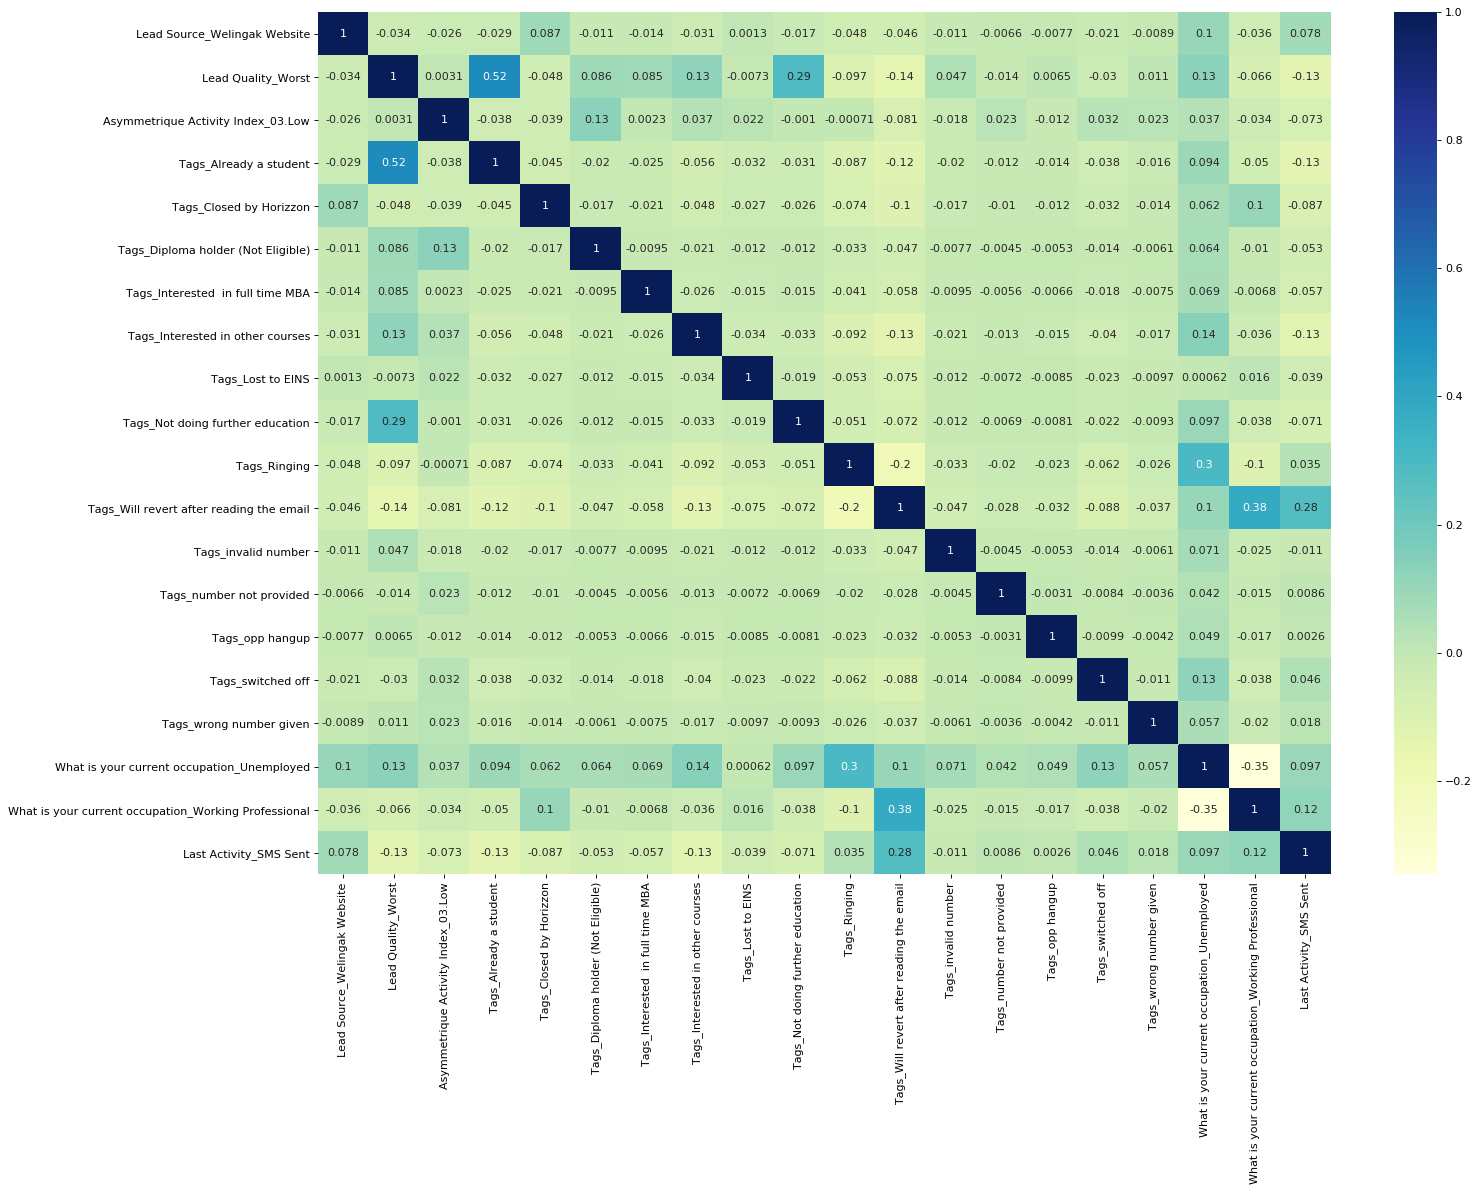

In [101]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

Dropping the Variable and Updating the Model

In [102]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1207.1
Date:                Tue, 12 May 2020   Deviance:                       2414.1
Time:                        14:10:49   Pearson chi2:                 8.41e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6970      0.096    -28.194      0.000      -2.884      -2.510
Lead Source_Welingak Website                            24.5357   1.82e+04      0.001      0.999   -3.56e+04    3.57e+04
Lead Quality_Worst                                      -2.5132      0.781     -3.217      0.001      -4.044      -0.982
Asymmetrique Activity Index_03.Low                      -2.1501      0.363     -5.918      0.000      -2.862      -1.438
Tags_Already a student                                  -3.8057      0.728     -5.224      0.000      -5.233      -2.378
Tags_Closed by Horizzon                                  5.3495      0.723      7.402      0.000       3.933       6.766
Tags_Diploma holder (Not Eligible)                     -24.4179   2.88e+04     -0.001      0.999   -5.65e+04    5.65e+04
Tags_Interested  in full time MBA                       -3.7095      1.030     -3.602      0.000      -5.728      -1.691
Tags_Interested in other courses                        -2.9795      0.345     -8.637      0.000      -3.656      -2.303
Tags_Lost to EINS                                        6.4945      0.808      8.037      0.000       4.911       8.078
Tags_Not doing further education                        -3.6806      1.033     -3.562      0.000      -5.706      -1.655
Tags_Ringing                                            -4.5710      0.278    -16.432      0.000      -5.116      -4.026
Tags_Will revert after reading the email                 3.6473      0.191     19.098      0.000       3.273       4.022
Tags_invalid number                                    -25.6008   2.91e+04     -0.001      0.999   -5.71e+04     5.7e+04
Tags_opp hangup                                         -3.4805      1.063     -3.276      0.001      -5.563      -1.398
Tags_switched off                                       -4.8088      0.599     -8.027      0.000      -5.983      -3.635
Tags_wrong number given                                -26.1228   3.61e+04     -0.001      0.999   -7.09e+04    7.08e+04
What is your current occupation_Unemployed               2.1601      0.120     18.073      0.000       1.926       2.394
What is your current occupation_Working Professional     2.0128      0.343      5.863      0.000       1.340       2.686
Last Activity_SMS Sent                                   2.2159      0.116     19.029      0.000       1.988       2.444
========================================================================================================================
"""

In [104]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000555
7273    0.231508
4998    0.063150
6668    0.006013
2917    0.021590
1668    0.006013
8738    0.063748
1474    0.006013
4583    0.381987
1786    0.842772
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.55160193e-04, 2.31508255e-01, 6.31503774e-02, 6.01278867e-03,
       2.15896301e-02, 6.01278867e-03, 6.37483580e-02, 6.01278867e-03,
       3.81986714e-01, 8.42772091e-01])

In [106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000555,532
1,1,0.231508,7273
2,0,0.063150,4998
3,0,0.006013,6668
4,0,0.021590,2917


In [107]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000555,532,0
1,1,0.231508,7273,0
2,0,0.063150,4998,0
3,0,0.006013,6668,0
4,0,0.021590,2917,0


In [108]:
from sklearn import metrics

In [109]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3653   91]
 [ 379 1904]]


In [110]:
# checking accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.922017587522814


In [111]:
#checking VIFS

In [112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Not doing further education,1.30
4,Tags_Closed by Horizzon,1.27
14,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.11
5,Tags_Diploma holder (Not Eligible),1.09
0,Lead Source_Welingak Website,1.09
8,Tags_Lost to EINS,1.07
12,Tags_invalid number,1.07
2,Asymmetrique Activity Index_03.Low,1.07
15,Tags_wrong number given,1.04


## Dropping the Variable and Updating the Model

In [115]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.5
Date:                Tue, 12 May 2020   Deviance:                       2463.0
Time:                        14:11:06   Pearson chi2:                 8.27e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6743      0.094    -28.305      0.000      -2.860      -2.489
Lead Source_Welingak Website                            24.6354   1.81e+04      0.001      0.999   -3.55e+04    3.56e+04
Lead Quality_Worst                                      -2.7836      0.746     -3.731      0.000      -4.246      -1.321
Asymmetrique Activity Index_03.Low                      -2.1120      0.363     -5.822      0.000      -2.823      -1.401
Tags_Already a student                                  -3.6755      0.726     -5.061      0.000      -5.099      -2.252
Tags_Closed by Horizzon                                  5.4132      0.722      7.499      0.000       3.998       6.828
Tags_Diploma holder (Not Eligible)                     -24.2953   2.87e+04     -0.001      0.999   -5.64e+04    5.63e+04
Tags_Interested  in full time MBA                       -3.5914      1.029     -3.492      0.000      -5.607      -1.576
Tags_Interested in other courses                        -2.8655      0.344     -8.340      0.000      -3.539      -2.192
Tags_Lost to EINS                                        6.5838      0.821      8.020      0.000       4.975       8.193
Tags_Not doing further education                        -3.5410      1.032     -3.432      0.001      -5.563      -1.519
Tags_Ringing                                            -4.4302      0.276    -16.035      0.000      -4.972      -3.889
Tags_Will revert after reading the email                 3.7114      0.190     19.555      0.000       3.339       4.083
Tags_invalid number                                    -25.4580   2.91e+04     -0.001      0.999    -5.7e+04     5.7e+04
Tags_opp hangup                                         -3.3387      1.061     -3.146      0.002      -5.418      -1.259
Tags_switched off                                       -4.6642      0.598     -7.799      0.000      -5.836      -3.492
What is your current occupation_Unemployed               2.0429      0.117     17.435      0.000       1.813       2.273
What is your current occupation_Working Professional     1.9381      0.343      5.648      0.000       1.266       2.611
Last Activity_SMS Sent                                   2.1585      0.114     18.900      0.000       1.935       2.382
========================================================================================================================
"""

In [117]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000606
7273    0.254467
4998    0.064504
6668    0.006295
2917    0.015951
1668    0.006295
8738    0.060456
1474    0.006295
4583    0.373826
1786    0.821572
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.06178975e-04, 2.54466917e-01, 6.45040056e-02, 6.29484356e-03,
       1.59513246e-02, 6.29484356e-03, 6.04559779e-02, 6.29484356e-03,
       3.73826433e-01, 8.21571534e-01])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000606,532
1,1,0.254467,7273
2,0,0.064504,4998
3,0,0.006295,6668
4,0,0.015951,2917


In [120]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000606,532,0
1,1,0.254467,7273,0
2,0,0.064504,4998,0
3,0,0.006295,6668,0
4,0,0.015951,2917,0


In [121]:
from sklearn import metrics

In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3643  101]
 [ 379 1904]]


In [123]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.920358387257342


In [124]:
# checking VIFs

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Not doing further education,1.29
4,Tags_Closed by Horizzon,1.27
14,Tags_switched off,1.18
6,Tags_Interested in full time MBA,1.10
5,Tags_Diploma holder (Not Eligible),1.09
0,Lead Source_Welingak Website,1.09
8,Tags_Lost to EINS,1.07
2,Asymmetrique Activity Index_03.Low,1.07
12,Tags_invalid number,1.06
13,Tags_opp hangup,1.03


Dropping the Variable and Updating the Model

In [127]:
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.1
Date:                Tue, 12 May 2020   Deviance:                       2484.2
Time:                        14:11:21   Pearson chi2:                 8.44e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6894      0.095    -28.372      0.000      -2.875      -2.504
Lead Source_Welingak Website                            24.6893    1.8e+04      0.001      0.999   -3.53e+04    3.54e+04
Lead Quality_Worst                                      -2.9241      0.719     -4.066      0.000      -4.334      -1.515
Asymmetrique Activity Index_03.Low                      -2.1621      0.358     -6.044      0.000      -2.863      -1.461
Tags_Already a student                                  -3.5997      0.726     -4.959      0.000      -5.022      -2.177
Tags_Closed by Horizzon                                  5.4708      0.721      7.583      0.000       4.057       6.885
Tags_Interested  in full time MBA                       -3.5260      1.029     -3.427      0.001      -5.543      -1.509
Tags_Interested in other courses                        -2.8012      0.344     -8.153      0.000      -3.475      -2.128
Tags_Lost to EINS                                        6.6867      0.828      8.077      0.000       5.064       8.309
Tags_Not doing further education                        -3.4678      1.032     -3.360      0.001      -5.491      -1.445
Tags_Ringing                                            -4.3795      0.276    -15.870      0.000      -4.920      -3.839
Tags_Will revert after reading the email                 3.7670      0.189     19.900      0.000       3.396       4.138
Tags_invalid number                                    -25.3999   2.91e+04     -0.001      0.999    -5.7e+04     5.7e+04
Tags_opp hangup                                         -3.2823      1.062     -3.091      0.002      -5.364      -1.201
Tags_switched off                                       -4.6146      0.598     -7.717      0.000      -5.787      -3.443
What is your current occupation_Unemployed               1.9864      0.116     17.063      0.000       1.758       2.215
What is your current occupation_Working Professional     1.8979      0.343      5.539      0.000       1.226       2.569
Last Activity_SMS Sent                                   2.1844      0.114     19.196      0.000       1.961       2.407
========================================================================================================================
"""

In [129]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000564
7273    0.252655
4998    0.063603
6668    0.006166
2917    0.014149
1668    0.006166
8738    0.053905
1474    0.006166
4583    0.376377
1786    0.814791
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.64116029e-04, 2.52654814e-01, 6.36031744e-02, 6.16642865e-03,
       1.41488237e-02, 6.16642865e-03, 5.39050207e-02, 6.16642865e-03,
       3.76377353e-01, 8.14791052e-01])

Creating a dataframe with the actual churn flag and the predicted probabilities



In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000564,532
1,1,0.252655,7273
2,0,0.063603,4998
3,0,0.006166,6668
4,0,0.014149,2917


In [132]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000564,532,0
1,1,0.252655,7273,0
2,0,0.063603,4998,0
3,0,0.006166,6668,0
4,0,0.014149,2917,0


In [133]:
from sklearn import metrics

In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3642  102]
 [ 379 1904]]


In [135]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9201924672307947


In [136]:
# checking VIFs

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Not doing further education,1.27
4,Tags_Closed by Horizzon,1.26
13,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.09
7,Tags_Lost to EINS,1.07
11,Tags_invalid number,1.06
2,Asymmetrique Activity Index_03.Low,1.06
12,Tags_opp hangup,1.03
15,What is your current occupation_Working Profes...,0.74


Dropping the Variable and Updating the Model

In [139]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [140]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1265.8
Date:                Tue, 12 May 2020   Deviance:                       2531.7
Time:                        14:11:33   Pearson chi2:                 8.61e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6909      0.094    -28.496      0.000      -2.876      -2.506
Lead Source_Welingak Website                            24.7961   1.79e+04      0.001      0.999   -3.51e+04    3.51e+04
Lead Quality_Worst                                      -3.2138      0.684     -4.697      0.000      -4.555      -1.873
Asymmetrique Activity Index_03.Low                      -2.0944      0.360     -5.812      0.000      -2.801      -1.388
Tags_Already a student                                  -3.4637      0.725     -4.776      0.000      -4.885      -2.042
Tags_Closed by Horizzon                                  5.5620      0.721      7.716      0.000       4.149       6.975
Tags_Interested  in full time MBA                       -3.4031      1.029     -3.308      0.001      -5.419      -1.387
Tags_Interested in other courses                        -2.6811      0.343     -7.820      0.000      -3.353      -2.009
Tags_Lost to EINS                                        6.8217      0.844      8.078      0.000       5.167       8.477
Tags_Not doing further education                        -3.3294      1.032     -3.226      0.001      -5.352      -1.307
Tags_Ringing                                            -4.2552      0.275    -15.492      0.000      -4.794      -3.717
Tags_Will revert after reading the email                 3.8503      0.188     20.450      0.000       3.481       4.219
Tags_opp hangup                                         -3.1537      1.062     -2.970      0.003      -5.235      -1.072
Tags_switched off                                       -4.4896      0.597     -7.516      0.000      -5.660      -3.319
What is your current occupation_Unemployed               1.8699      0.114     16.332      0.000       1.645       2.094
What is your current occupation_Working Professional     1.8215      0.343      5.307      0.000       1.149       2.494
Last Activity_SMS Sent                                   2.1762      0.112     19.402      0.000       1.956       2.396
========================================================================================================================
"""

In [141]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000608
7273    0.281919
4998    0.063514
6668    0.006205
2917    0.010564
1668    0.006205
8738    0.051400
1474    0.006205
4583    0.374088
1786    0.794975
dtype: float64

In [142]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.07886214e-04, 2.81918507e-01, 6.35140356e-02, 6.20488694e-03,
       1.05638139e-02, 6.20488694e-03, 5.14002613e-02, 6.20488694e-03,
       3.74087585e-01, 7.94974829e-01])

In [143]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000608,532
1,1,0.281919,7273
2,0,0.063514,4998
3,0,0.006205,6668
4,0,0.010564,2917


In [144]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000608,532,0
1,1,0.281919,7273,0
2,0,0.063514,4998,0
3,0,0.006205,6668,0
4,0,0.010564,2917,0


In [145]:
from sklearn import metrics

In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3636  108]
 [ 379 1904]]


In [147]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9191969470715116


In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Not doing further education,1.26
4,Tags_Closed by Horizzon,1.25
12,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.09
0,Lead Source_Welingak Website,1.08
7,Tags_Lost to EINS,1.06
2,Asymmetrique Activity Index_03.Low,1.05
11,Tags_opp hangup,1.02
14,What is your current occupation_Working Profes...,0.73
1,Lead Quality_Worst,0.61


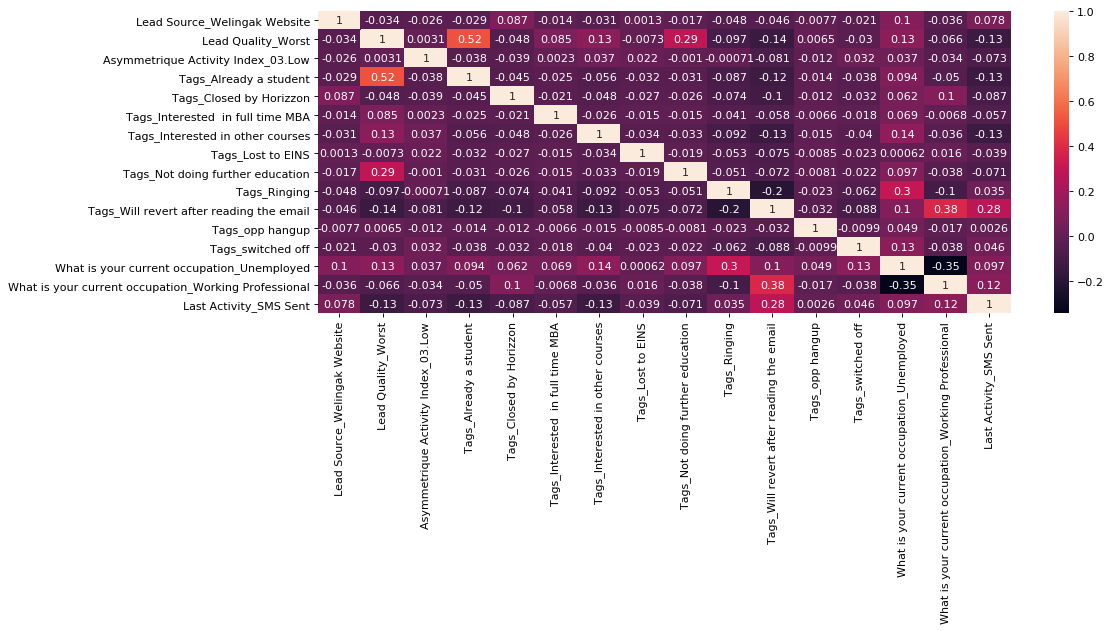

In [150]:
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True)

plt.tight_layout()
plt.show()

### Step 8: Calculating Metrics beyond Accuracy

In [151]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [152]:
TP / float(TP+FN)

0.8339903635567236

In [153]:
TN / float(TN+FP)

0.9711538461538461

In [154]:
print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

0.028846153846153848
0.9463220675944334
0.9056039850560399


## Step 9: Plotting the ROC Curve

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Calculating the area under the curve

In [157]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [158]:
auc = auc_val(fpr,tpr)
auc

0.9668445421566313

## Step 10: Finding Optimal Cutoff Point

optimal cutoff meand the probability of sensitivity and specificity

In [159]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000608,532,0,1,0,0,0,0,0,0,0,0,0
1,1,0.281919,7273,0,1,1,1,0,0,0,0,0,0,0
2,0,0.063514,4998,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006205,6668,0,1,0,0,0,0,0,0,0,0,0
4,0,0.010564,2917,0,1,0,0,0,0,0,0,0,0,0


In [160]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


In [161]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378795  1.000000  0.000000
0.1   0.1  0.887340  0.959264  0.843483
0.2   0.2  0.890493  0.958826  0.848825
0.3   0.3  0.890825  0.954008  0.852297
0.4   0.4  0.919031  0.833990  0.970887
0.5   0.5  0.919197  0.833990  0.971154
0.6   0.6  0.919197  0.833990  0.971154
0.7   0.7  0.919031  0.833552  0.971154
0.8   0.8  0.887672  0.723609  0.987714
0.9   0.9  0.887174  0.722295  0.987714


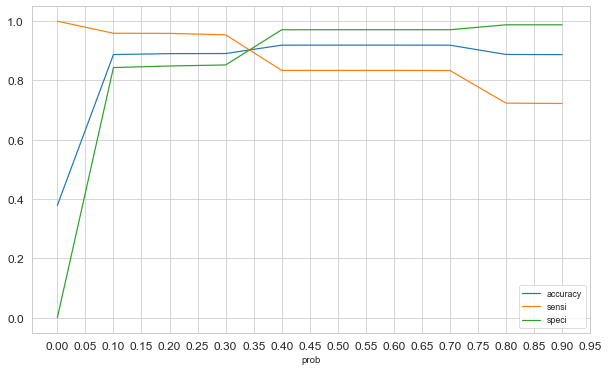

In [162]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [163]:
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000608,532,0,1,0,0,0,0,0,0,0,0,0
1,1,0.281919,7273,0,1,1,1,0,0,0,0,0,0,0
2,0,0.063514,4998,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006205,6668,0,1,0,0,0,0,0,0,0,0,0
4,0,0.010564,2917,0,1,0,0,0,0,0,0,0,0,0


In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000608,532,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.281919,7273,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.063514,4998,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006205,6668,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.010564,2917,0,1,0,0,0,0,0,0,0,0,0,0


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9080803052928489

In [166]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3433,  311],
       [ 243, 2040]], dtype=int64)

In [167]:
TP = confusion1[1,1] 
TN = confusion1[0,0]
FP = confusion1[0,1] 
FN = confusion1[1,0] 

In [168]:
TP / float(TP+FN)

0.8935611038107752

In [169]:
TP / float(TP+FN)

0.8935611038107752

In [170]:
print(FP/ float(TN+FP))

0.08306623931623931


In [171]:
print (TP / float(TP+FP))

0.8677158655891111


In [172]:
print (TN / float(TN+ FN))

0.9338955386289445


## Step 11: Precision and Recall

Precision
TP / TP + FP

In [173]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8677158655891111

Recall
TP / TP + FN

In [174]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8935611038107752

In [175]:
from sklearn.metrics import precision_score, recall_score

In [176]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8677158655891111

In [177]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8935611038107752

## Precision and recall tradeoff

In [178]:
from sklearn.metrics import precision_recall_curve

In [179]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6022    0
 6023    0
 6024    0
 6025    0
 6026    1
 Name: Converted, Length: 6027, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6022    0
 6023    0
 6024    1
 6025    0
 6026    0
 Name: final_predicted, Length: 6027, dtype: int64)

In [180]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

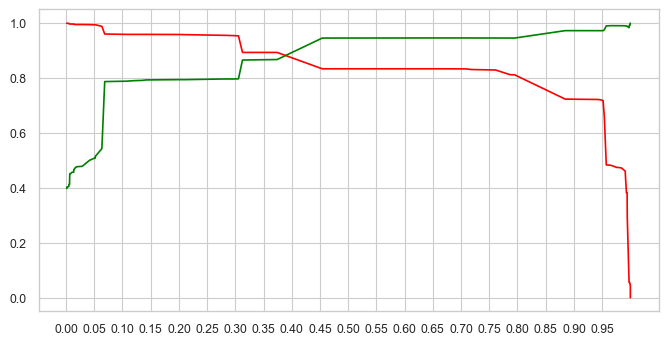

In [181]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80%



## Calculating the F1 score

In [182]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8804488562796721

## Step 12: Making predictions on the test set

In [183]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
376,0,0,0.538134,-0.184951,1.180749,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8914,0,0,-0.326064,-0.866444,-0.040895,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7331,0,0,0.106035,-0.210737,0.569927,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6344,0,0,-0.326064,1.124622,-0.040895,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3783,0,0,2.698630,-0.126011,0.569927,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [184]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8914,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7331,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3783,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [185]:
X_test_sm = sm.add_constant(X_test)

In [186]:
y_test_pred = res.predict(X_test_sm)

In [187]:
y_test_pred[:10]

376     0.063514
8914    0.000554
7331    0.006205
6344    0.063514
3783    0.305557
4783    0.006205
3789    0.997529
185     0.029253
4116    0.951703
8622    0.984185
dtype: float64

In [188]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
376,0.063514
8914,0.000554
7331,0.006205
6344,0.063514
3783,0.305557


In [189]:
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,376,0.063514
1,0,8914,0.000554
2,0,7331,0.006205
3,1,6344,0.063514
4,0,3783,0.305557


In [190]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [191]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,376,0.063514
1,0,8914,0.000554
2,0,7331,0.006205
3,1,6344,0.063514
4,0,3783,0.305557


In [192]:
y_pred_final.shape

(2584, 3)

In [193]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [194]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,376,0.063514,0
1,0,8914,0.000554,0
2,0,7331,0.006205,0
3,1,6344,0.063514,0
4,0,3783,0.305557,0


In [195]:
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.8947368421052632

In [196]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1434  142]
 [ 130  878]]


## Confusion Matrix in Visuals

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [198]:
TP / float(TP+FN)

0.8935611038107752

Specificity TN / TN + FP

In [199]:
TN / float(TN+FP)

0.9169337606837606

False Postive Rate FP / TN + FP

In [200]:
print(FP/ float(TN+FP))

0.08306623931623931


Positive Predictive Value TP / TP + FP

In [201]:
print (TP / float(TP+FP))

0.8677158655891111


Negative Predictive Value TN / TN + FN

In [202]:
print (TN / float(TN+ FN))

0.9338955386289445


Precision TP / TP + FP

In [203]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8607843137254902

Recall TP / TP + FN

In [204]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.871031746031746

In [205]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8658777120315583

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1576
           1       0.86      0.87      0.87      1008

    accuracy                           0.89      2584
   macro avg       0.89      0.89      0.89      2584
weighted avg       0.89      0.89      0.89      2584



In [207]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.84320557 0.90940767 0.91521487 0.91637631 0.92450639 0.92682927
 0.92799071 0.92799071 0.93271462 0.93379791]
0.9158034013220477


## Plotting the ROC Curve for Test Dataset

In [208]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [209]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

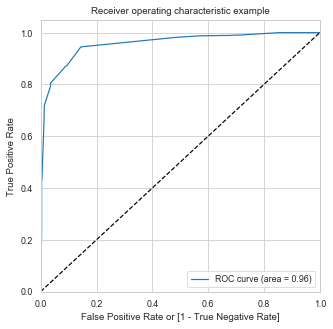

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.34517766e-04,
        1.26903553e-03, 1.26903553e-03, 1.26903553e-03, 1.26903553e-03,
        1.26903553e-03, 1.26903553e-03, 1.26903553e-03, 1.26903553e-03,
        3.17258883e-03, 3.17258883e-03, 3.17258883e-03, 3.17258883e-03,
        3.17258883e-03, 4.44162437e-03, 4.44162437e-03, 4.44162437e-03,
        4.44162437e-03, 1.14213198e-02, 1.26903553e-02, 1.26903553e-02,
        1.26903553e-02, 1.26903553e-02, 3.48984772e-02, 3.48984772e-02,
        3.48984772e-02, 3.55329949e-02, 9.01015228e-02, 9.32741117e-02,
        1.43401015e-01, 1.44670051e-01, 1.48477157e-01, 1.49746193e-01,
        1.52918782e-01, 1.54822335e-01, 1.55456853e-01, 1.56725888e-01,
        1.57360406e-01, 4.87944162e-01, 5.62182741e-01, 5.81852792e-01,
        5.82487310e-01, 6.00253807e-01, 6.57994924e-01, 6.59898477e-01,
        6.60532995e-01, 6.63071066e-01, 6.63705584e-01, 6.725888

In [210]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [211]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [212]:
auc = auc_val(fpr,tpr)
auc

0.957425935158327

## Step 13: Calculating Lead score for the entire dataset

In [213]:
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,376,0.063514,0
1,0,8914,0.000554,0
2,0,7331,0.006205,0
3,1,6344,0.063514,0
4,0,3783,0.305557,0


In [214]:
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000608,532,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.281919,7273,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.063514,4998,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006205,6668,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.010564,2917,0,1,0,0,0,0,0,0,0,0,0,0


In [215]:
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,532,0,0.000608,0
1,7273,1,0.281919,0
2,4998,0,0.063514,0
3,6668,0,0.006205,0
4,2917,0,0.010564,0


In [216]:
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,532,0,0.000608,0
1,7273,1,0.281919,0
2,4998,0,0.063514,0
3,6668,0,0.006205,0
4,2917,0,0.010564,0


In [217]:
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6027, 4)
(2584, 4)
(8611, 4)


In [218]:
len(lead_full_pred['LeadID'].unique().tolist())

8611

In [219]:
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,532,0,0.000608,0,0
1,7273,1,0.281919,0,28
2,4998,0,0.063514,0,6
3,6668,0,0.006205,0,1
4,2917,0,0.010564,0,1


In [220]:
lead_full_pred.LeadID.max()

9239

In [221]:
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.029253,0,3
1,0,0.006205,0,1
2,1,0.761224,1,76
3,0,0.006205,0,1
4,1,0.953880,1,95


In [222]:
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [223]:
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.029253,0,3
1,660728,0,0.006205,0,1
2,660727,1,0.761224,1,76
3,660719,0,0.006205,0,1
4,660681,1,0.953880,1,95
5,660680,0,0.063514,0,6
6,660673,1,0.953880,1,95
7,660664,0,0.063514,0,6
8,660624,0,0.063514,0,6
9,660616,0,0.063514,0,6


In [224]:
leads_with_score.shape

(8611, 5)

In [225]:
total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Conversion_Prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


## Step 14: Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept

In [226]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                           24.80
Lead Quality_Worst                                     -3.21
Asymmetrique Activity Index_03.Low                     -2.09
Tags_Already a student                                 -3.46
Tags_Closed by Horizzon                                 5.56
Tags_Interested  in full time MBA                      -3.40
Tags_Interested in other courses                       -2.68
Tags_Lost to EINS                                       6.82
Tags_Not doing further education                       -3.33
Tags_Ringing                                           -4.26
Tags_Will revert after reading the email                3.85
Tags_opp hangup                                        -3.15
Tags_switched off                                      -4.49
What is your current occupation_Unemployed              1.87
What is your current occupation_Working Professional    1.82
Last Activity_SMS Sent                                  2.18
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [227]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                           100.00
Lead Quality_Worst                                     -12.96
Asymmetrique Activity Index_03.Low                      -8.45
Tags_Already a student                                 -13.97
Tags_Closed by Horizzon                                 22.43
Tags_Interested  in full time MBA                      -13.72
Tags_Interested in other courses                       -10.81
Tags_Lost to EINS                                       27.51
Tags_Not doing further education                       -13.43
Tags_Ringing                                           -17.16
Tags_Will revert after reading the email                15.53
Tags_opp hangup                                        -12.72
Tags_switched off                                      -18.11
What is your current occupation_Unemployed               7.54
What is your current occupation_Working Professional     7.35
Last Activity_SMS Sent                                   8.78
dtype: f

Sorting the feature variables based on their relative coefficient values

In [228]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

Lead Source_Welingak Website                            12
Lead Quality_Worst                                       9
Asymmetrique Activity Index_03.Low                       3
Tags_Already a student                                   5
Tags_Closed by Horizzon                                  8
Tags_Interested  in full time MBA                        1
Tags_Interested in other courses                        11
Tags_Lost to EINS                                        6
Tags_Not doing further education                         2
Tags_Ringing                                            14
Tags_Will revert after reading the email                13
Tags_opp hangup                                         15
Tags_switched off                                       10
What is your current occupation_Unemployed               4
What is your current occupation_Working Professional     7
Last Activity_SMS Sent                                   0
dtype: int64

Plot showing the feature variables based on their relative coefficient values

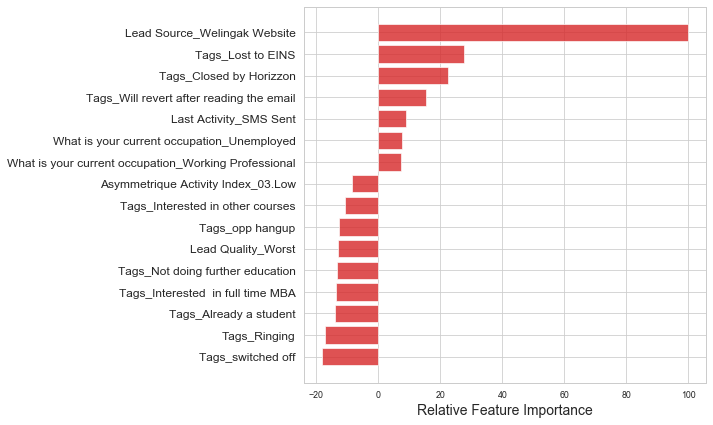

In [229]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [230]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
0,Lead Source_Welingak Website,100.00
7,Tags_Lost to EINS,27.51
4,Tags_Closed by Horizzon,22.43


## Step 15: Conclusion


After trying several models, we finally chose a model with the following characteristics:
1<font color = blue>All variables have p-value < 0.05. </font>
<font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
<font color = blue>The overall accuracy of 0.9056 at a probability threshold of 0.33 on the heat map.</font>